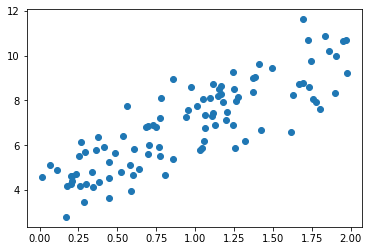

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

plt.scatter(X,y)
plt.show()


In [3]:
# 正规方程
X_b = np.c_[np.ones((100,1)) , X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[4.00065922],
       [3.03621565]])

In [4]:
# 做预测
X_new = np.array([[0],[1]])
X_new_b = np.c_[np.ones((2,1)) , X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[4.00065922],
       [7.03687487]])

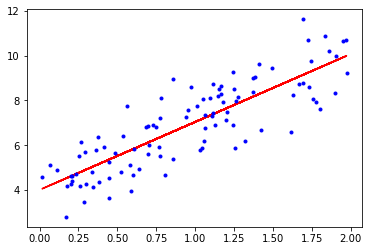

In [5]:
plt.plot(X,X_b.dot(theta_best),'r-')
plt.plot(X,y,'b.')
plt.show()

In [6]:
# 使用sklearn做线性回归
# 此函数会计算wei'ni
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[4.00065922],
       [7.03687487]])

In [7]:
# 当特征数或训练实例很大时，内存无法满足
# 批量梯度下降
eta = 0.1
n_itreations = 1000
m = 100

theta = np.random.randn(2,1)

for it in range(n_itreations):
    gradinets = 2/m* X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradinets
theta

array([[4.00065922],
       [3.03621565]])

In [8]:
# 随机梯度下降
n_epochs = 50
t0, t1 = 5, 50
# 学习率调动，逐渐减小，也就是模拟退火
def learning_schedule(t):
    return t0 / (t1 + t)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradinets = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradinets
theta

array([[3.96097542],
       [3.08442709]])

In [9]:
# sklearn的随机梯度下降
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y)
sgd_reg.intercept_,sgd_reg.coef_

(array([3.95001011]), array([2.9927578]))

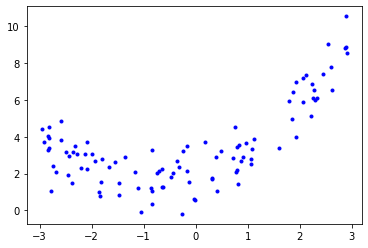

In [10]:
# 多项式回归
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X, y, 'b.')

In [11]:
from sklearn.preprocessing import PolynomialFeatures
ploy_features = PolynomialFeatures(degree=2, include_bias=False)
X_ploy = ploy_features.fit_transform(X)
X[0],X_ploy[0]

(array([-1.47008646]), array([-1.47008646,  2.16115419]))

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_ploy, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92377334]), array([[0.88544149, 0.52549986]]))

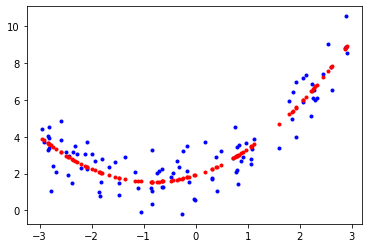

In [13]:
plt.plot(X, y, 'b.')
plt.plot(X,lin_reg.predict(X_ploy),'r.')

In [14]:
# 学习曲线
# 绘制模型在训练集和验证集上关于训练集大小的性能函数；
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X,y):
    trains_error, vals_error =[],[]
    X_train,X_val,  y_train, y_val = train_test_split(X,y,test_size = 0.2)
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        trains_error.append(mean_squared_error(y_train[:m],y_train_pred))
        vals_error.append(mean_squared_error(y_val_pred,y_val))
    plt.axis([0,80,0,3])
    plt.plot(np.sqrt(trains_error),'r-+',label='train')
    plt.plot(np.sqrt(vals_error),'b-',label='val')




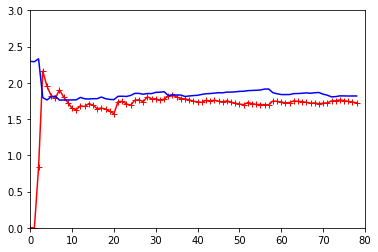

In [15]:
plot_learning_curves(lin_reg,X,y)
# 训练误差和验证误差都很高很接近，典型的欠拟合模型；
# 当前模型很难拟合数据，提供更多的训练数据也没用；

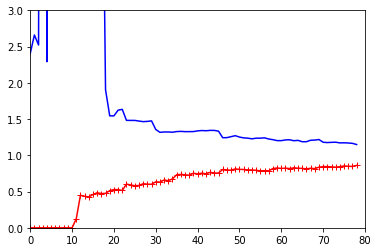

In [16]:
# 10阶多项式模型
# 训练误差比验证误差小，模型过拟合；可以通过提高训练数据改善过拟合，知道验证误差达到训练误差位为止；
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg',LinearRegression())
])

plot_learning_curves(poly_regression,X,y)

In [18]:
 # 正则化
 # 岭回归
 from sklearn.linear_model import Ridge
 ridge_reg = Ridge(alpha=1, solver='cholesky')
 ridge_reg.fit(X,y)
 ridge_reg.predict([[1.5]])

array([[4.76710957]])

In [19]:
# lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)    
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.71789588])

In [20]:
# 弹性网络
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X,y)
elastic_reg.predict([[1.5]])

array([4.72493492])

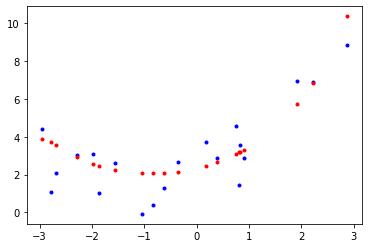

In [27]:
# 提前停止
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train,X_val,  y_train, y_val = train_test_split(X,y,test_size = 0.2)
ploy_scaler = Pipeline([
    ('plot_feature',PolynomialFeatures(degree= 90, include_bias=False)),
    ('scaler',StandardScaler())
,
])

X_train_poly_scaler = ploy_scaler.fit_transform(X_train)
X_val_poly_scaler = ploy_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,warm_start=True, penalty=None,eta0=0.0005,learning_rate='constant')
best_epoch =None
best_model=None
minimum_val_error = float('inf')
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaler, y_train)
    y_val_pred = sgd_reg.predict(X_val_poly_scaler)
    y_val_error = mean_squared_error(y_val, y_val_pred)
    if y_val_error < minimum_val_error:
        minimum_val_error = y_val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
plt.plot(X_val,y_val,'b.')
plt.plot(X_val,sgd_reg.predict(X_val_poly_scaler),'r.')



In [28]:
# 逻辑回归
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

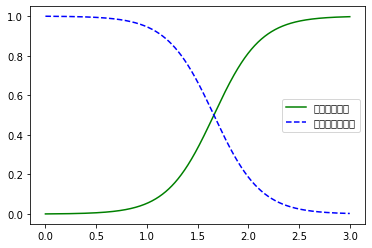

In [34]:
# 单分类
X = iris['data'][:,3].reshape(-1,1) #花瓣宽度
y = (iris['target'] == 2).astype(np.int).reshape(-1,1)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new , y_proba[:,1],'g-',label='维吉尼亚鸢尾')
plt.plot(X_new , y_proba[:,0],'b--',label='非维吉尼亚鸢尾')
plt.legend()


In [35]:
# softmax
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [36]:
softmax_reg.predict([[5,2]])

array([2])

In [37]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])